In [1]:
import os, sys
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [18]:
def plot_cnet_stat(STAT, DIR):
    # find files in bash directory that start with cnetTrain and end with .out 
    files = [i for i in os.listdir(DIR) if "_tr.quebracho." in i and i.endswith(".out")]
    df_list=[]
    for ind, out_file in enumerate(files):
        prefix=out_file.split(".")[0]
        epoch_lst = []
        loss_lst = []
        valLoss_lst = []
        vef1_lst = []
        vcf1_lst = []
        val_score_lst = []
        out_file_lst=[]
        file_txt = open(os.path.join(DIR, out_file),  'r', encoding="utf8")
        lines = file_txt.readlines()
        for line in lines:
            if "100%" in line and "val_loss" in line: # if it's that epoch and val_loss is there (1st line doesn't have it) ## 
                ep, sec_per_iter, loss, vnum, val_loss, vef1, vcf1, vmae, val_score = line.split(",")
                epoch_lst.append(ep.split(",")[0].split(":")[0])
                loss_lst.append(float(loss.split("=")[1]))
                valLoss_lst.append(float(val_loss.split("=")[1]))
                vef1_lst.append(float(vef1.split("=")[1]))
                vcf1_lst.append(float(vcf1.split("=")[1]))
                val_score_lst.append(float(val_score.split("=")[1].replace("]", "")))
        ep_num = [int(e.replace("Epoch ", "")) for e in epoch_lst]
        df = pd.DataFrame({'Epoch_num':ep_num,   'Epoch':epoch_lst,   'Loss':loss_lst, 
                                    'val_loss':valLoss_lst, 'vef1':vef1_lst,   'vcf1':vcf1_lst,  
                                    'val_score': val_score_lst   })
        df = df[["Epoch_num", "Epoch", STAT]]
        df['version'] = [prefix for _ in range(len(df))]
        df.columns = ["Epoch_num", "Epoch", STAT, 'version']
        df=df.set_index("Epoch")
        df_list.append(df)
    df_merged = pd.concat(df_list).drop_duplicates()
    fig = px.line(df_merged, x="Epoch_num", y=[STAT],  color="version")
    fig.update_layout(xaxis_title="Epoch", yaxis_title=STAT)
    fig.write_html(os.path.join(DIR, STAT+"_plots.html"))
    fig.show()


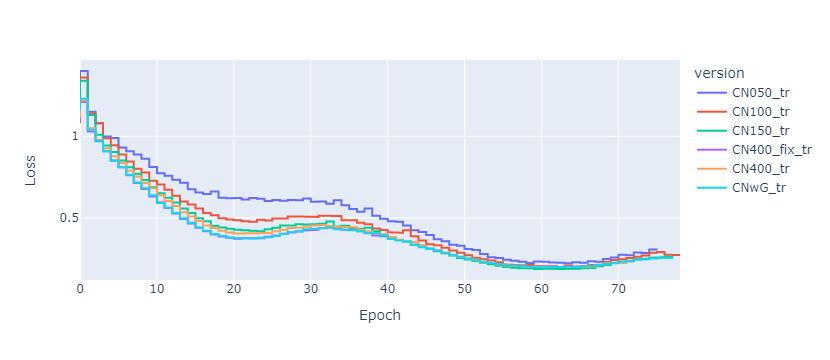

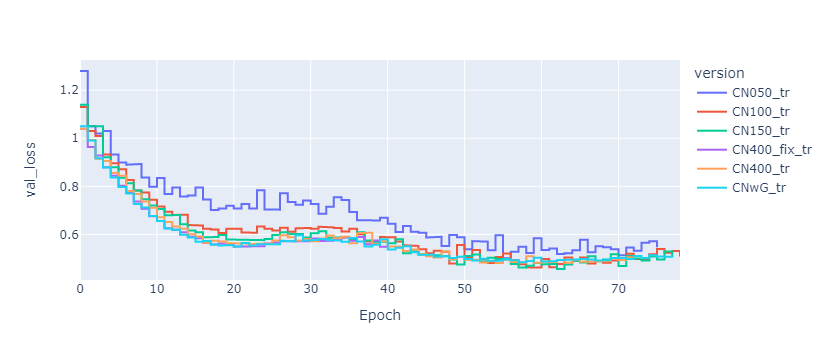

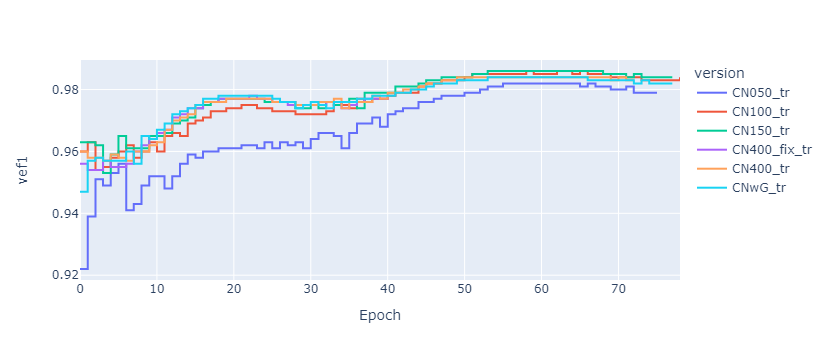

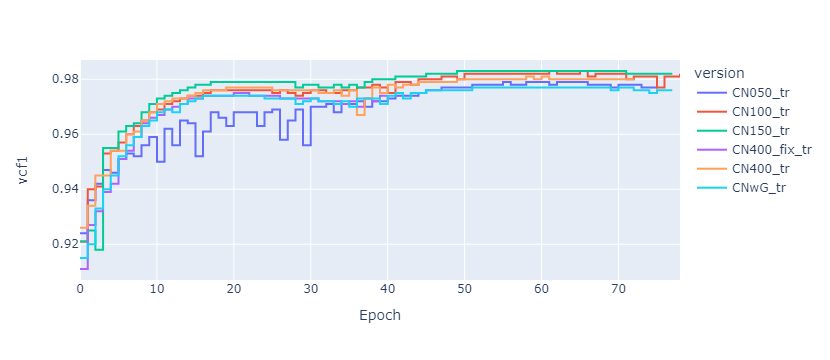

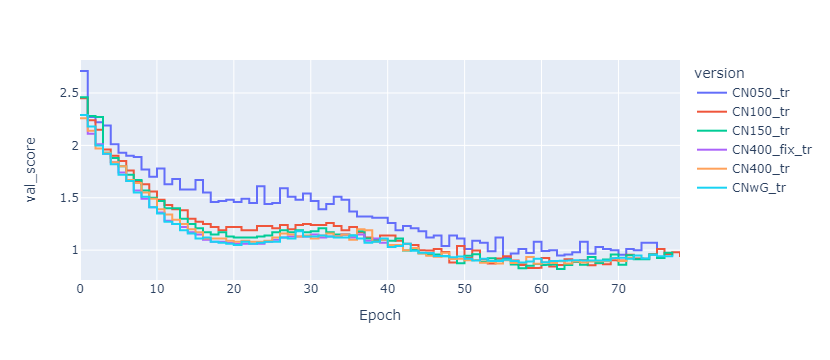

In [19]:
# DEFINE PLOT
STAT="val_loss"
DIR = r"C:\Users\Lauren\Documents\00_Paraguay\cnet_out"
##


STATS=["Loss", "val_loss", "vef1", "vcf1", "val_score"] 
for STAT in STATS:
    plot_cnet_stat(STAT, DIR=r"C:\Users\Lauren\Documents\00_Paraguay\cnet_out")